In [853]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [854]:
dataset = pd.read_csv('marketing_campaign.csv', sep=';')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [855]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dataset ini merupakan data responden terhadap campaign yang diberikan. Tedapat missing value pada data Income, dan untuk selanjutnya dilakukan prosesing terhadap data yang kosong.

In [856]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Dari hasil statistik terlihat nilai mean dan median pada fitur income tidak terlihat terlalu signifikan perbedaan. Untuk missing value akan diisi oleh data median

In [857]:
df = dataset.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [858]:
df['Income'] = df.Income.fillna(df.Income.median())

In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data df menunjukkan bahwa fitur income telah dilakukan prosesing median


# Feature Extraction

1. Fitur Total Anak

In [860]:
df['dependents']= df.Kidhome + df.Teenhome
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


2. Fitur Usia

In [861]:
df['Age'] = 2022 - df.Year_Birth
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,41


3. Fitur Kelompok Usia

In [862]:
df['Segmentation']=np.where(df['Age']<=35, "Young",
                               np.where(df['Age']<=50, 'Adult',
                                        np.where(df['Age']<75, 'Mature', 'Old')))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,65,Mature
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2,68,Mature
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,57,Mature
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1,38,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,41,Adult


4. Fitur Total Produk

In [863]:
# Total Product
prod_cols = [col for col in df.columns if 'Mnt' in col]
prod_cols
df['Total_Prod'] = (df[prod_cols].sum(axis=1)) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,65,Mature,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,68,Mature,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,57,Mature,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,38,Adult,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,41,Adult,422


5. Fitur Total Pembelian

In [864]:
# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
purchases_cols
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)
# df['Total_Purchases'] = df['Total_Purchases'] - df['NumDealsPurchases'] 

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,65,Mature,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2,68,Mature,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,57,Mature,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,38,Adult,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,41,Adult,422,19


In [865]:
df=df[df['Total_Purchases']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Dt_Customer          2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

# Split Data

In [866]:
from sklearn.model_selection import train_test_split

In [867]:
# X = df.drop('Response', axis=1)
# y = df.Response

In [868]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Response', axis=1),df['Response'] ,
                                   random_state=42, 
                                   test_size=0.2, shuffle=False)

In [869]:
train = X_train.join(y_train)
train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,dependents,Age,Segmentation,Total_Prod,Total_Purchases,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,0,65,Mature,1617,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,2,68,Mature,27,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,Mature,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,1,38,Adult,53,8,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,1,41,Adult,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,2870,1973,Graduation,Married,49094.0,0,1,2012-09-21,6,376,...,0,0,3,11,1,49,Adult,502,20,0
1787,8008,1983,Graduation,Together,36075.0,1,0,2013-12-09,54,46,...,0,0,3,11,1,39,Adult,119,7,0
1788,1513,1979,2n Cycle,Together,60839.0,1,1,2012-08-28,72,600,...,0,0,3,11,2,43,Adult,1250,29,0
1789,6173,1979,Graduation,Together,77298.0,0,1,2013-11-02,46,425,...,0,0,3,11,1,43,Adult,969,24,0


In [870]:
test = X_test.join(y_test)
test

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,dependents,Age,Segmentation,Total_Prod,Total_Purchases,Response
1791,9150,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,...,0,0,3,11,2,59,Mature,62,7,0
1792,7960,1962,2n Cycle,Together,82122.0,0,0,2013-08-15,89,734,...,0,0,3,11,0,60,Mature,1382,26,0
1793,1250,1976,Graduation,Single,37697.0,1,0,2014-02-07,82,34,...,0,0,3,11,1,46,Adult,84,7,0
1794,9905,1952,Graduation,Together,34074.0,1,1,2013-07-13,69,135,...,0,0,3,11,2,70,Mature,255,14,0
1795,10691,1960,Master,Married,28520.0,1,1,2013-06-14,55,11,...,0,0,3,11,2,62,Mature,43,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,1,55,Mature,1341,18,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,3,76,Old,444,22,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,41,Adult,1241,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,1,66,Mature,843,23,0


# Handle Outliers 


1. Produk

In [871]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

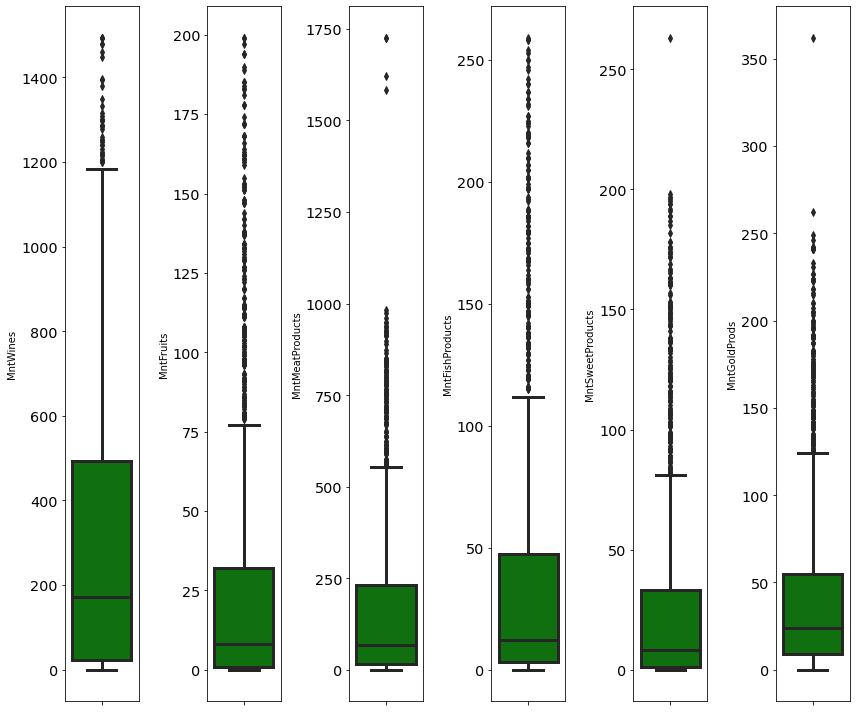

In [872]:
products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
products
for i in range(0, len(products)):
  plt.subplot(1, len(products),i+1)
  sns.boxplot(y=train[products[i]],color="green",orient='v')
  plt.tight_layout()

In [873]:
for i in ['MntWines']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=1200]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntWines outlier: 1788
Jumlah baris setelah memfilter MntWines outlier: 1754
persen yang dibuang : 1.9015659955257291


In [874]:
for i in ['MntFruits']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=160]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntFruits outlier: 1754
Jumlah baris setelah memfilter MntFruits outlier: 1721
persen yang dibuang : 1.8814139110604344


In [875]:
# outliers = ['MntMeatProducts', 'MntGoldProds', 'MntFishProducts']
for i in ['MntMeatProducts']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=1500]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntMeatProducts outlier: 1721
Jumlah baris setelah memfilter MntMeatProducts outlier: 1717
persen yang dibuang : 0.23242300987797648


In [876]:
for i in ['MntFishProducts']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=220]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntFishProducts outlier: 1717
Jumlah baris setelah memfilter MntFishProducts outlier: 1698
persen yang dibuang : 1.106581246359923


In [877]:
for i in ['MntSweetProducts']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=250]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntSweetProducts outlier: 1698
Jumlah baris setelah memfilter MntSweetProducts outlier: 1697
persen yang dibuang : 0.05889281507656108


In [878]:
for i in ['MntGoldProds']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=240]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntGoldProds outlier: 1697
Jumlah baris setelah memfilter MntGoldProds outlier: 1690
persen yang dibuang : 0.4124926340601007


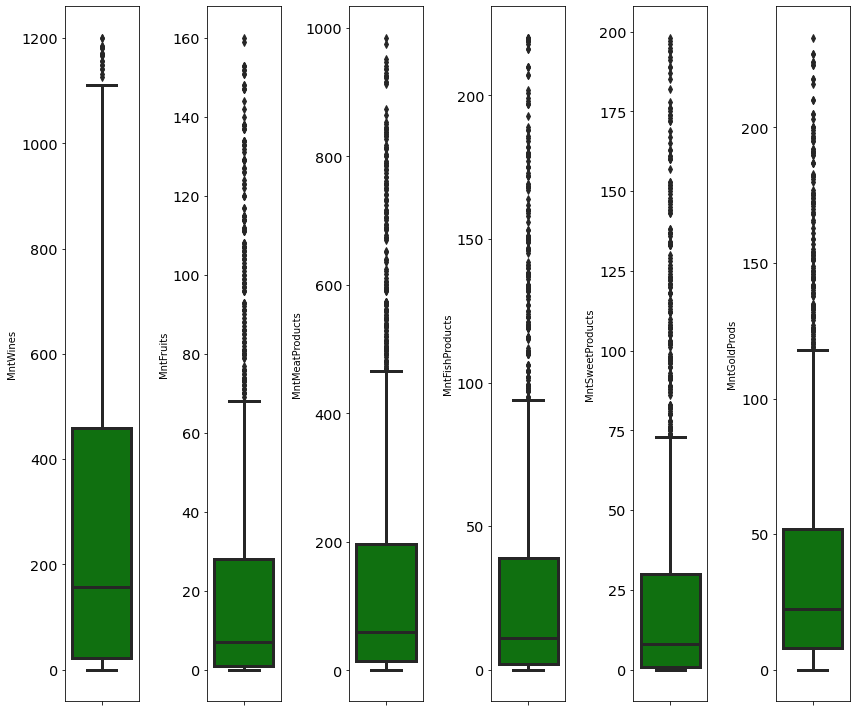

In [879]:
products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'] #Total_Prod dihapus
products
for i in range(0, len(products)):
  plt.subplot(1, len(products),i+1)
  sns.boxplot(y=train[products[i]],color="green",orient='v')
  plt.tight_layout()

2. Pembayaran/Purchases

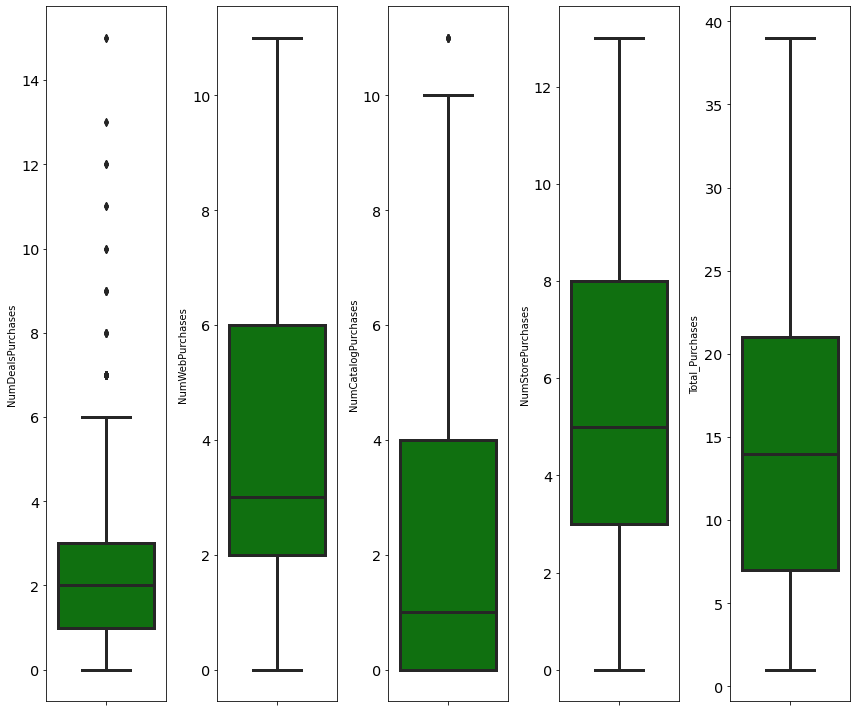

In [880]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']
purchases
for i in range(0, len(purchases)):
  plt.subplot(1, len(purchases),i+1)
  sns.boxplot(y=train[purchases[i]],color="green",orient='v')
  plt.tight_layout()

In [881]:
for i in ['NumCatalogPurchases']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=10]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter NumCatalogPurchases outlier: 1690
Jumlah baris setelah memfilter NumCatalogPurchases outlier: 1679
persen yang dibuang : 0.6508875739644964


In [882]:
for i in ['NumDealsPurchases']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=12]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter NumDealsPurchases outlier: 1679
Jumlah baris setelah memfilter NumDealsPurchases outlier: 1674
persen yang dibuang : 0.29779630732579676


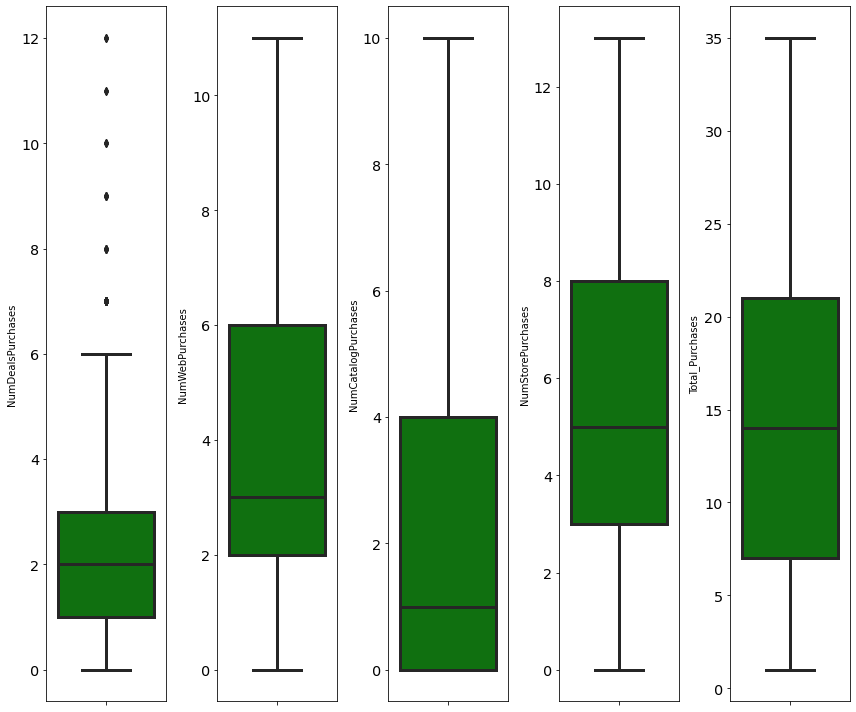

In [883]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']
purchases
for i in range(0, len(purchases)):
  plt.subplot(1, len(purchases),i+1)
  sns.boxplot(y=train[purchases[i]],color="green",orient='v')
  plt.tight_layout()

3. Income,Year_Birth,Age, NumWebVisitsMonth


In [884]:
train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'dependents',
       'Age', 'Segmentation', 'Total_Prod', 'Total_Purchases', 'Response'],
      dtype='object')

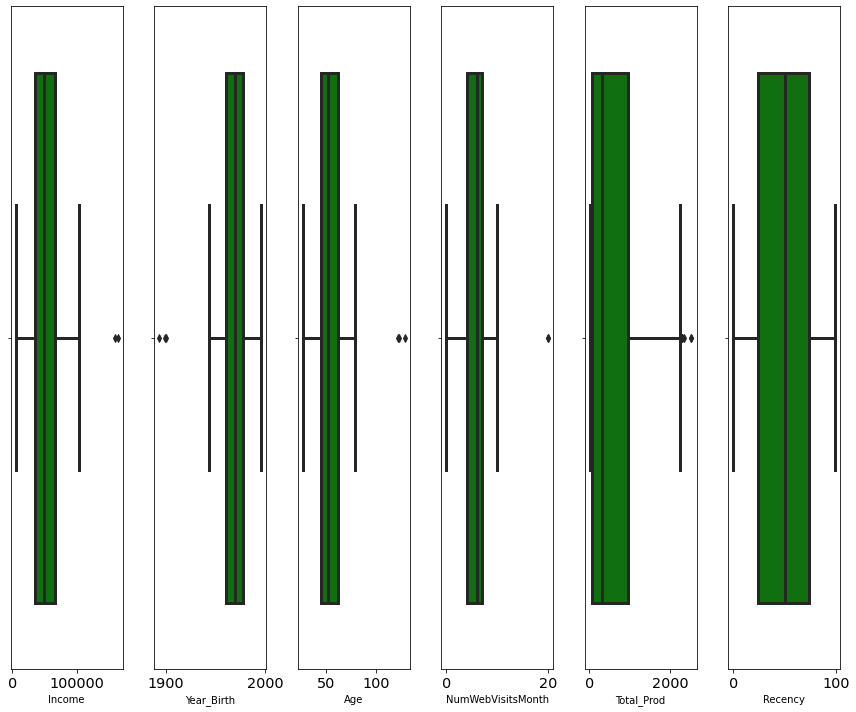

In [885]:
import warnings
warnings.filterwarnings('ignore')
outliers = ['Income','Year_Birth','Age','NumWebVisitsMonth','Total_Prod','Recency'] #ditambah Total_Prod
for i in range(0, len(outliers)):
  plt.subplot(1, len(outliers),i+1)
  sns.boxplot(x=train[outliers[i]],color="green",orient='v')
  plt.tight_layout()

In [886]:
for i in outliers:
  Q1 = train[i].quantile(.25)
  Q3 = train[i].quantile(.75)
  IQR = Q3 - Q1
  Batas_Atas = Q3 + 1.5*IQR
  Batas_Bawah = Q1 - 1.5*IQR
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[(train[i]<=Batas_Atas)&
              (train[i]>=Batas_Bawah)]

  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter Income outlier: 1674
Jumlah baris setelah memfilter Income outlier: 1672
persen yang dibuang : 0.11947431302270672
Jumlah baris sebelum memfilter Year_Birth outlier: 1672
Jumlah baris setelah memfilter Year_Birth outlier: 1669
persen yang dibuang : 0.17942583732057926
Jumlah baris sebelum memfilter Age outlier: 1669
Jumlah baris setelah memfilter Age outlier: 1669
persen yang dibuang : 0.0
Jumlah baris sebelum memfilter NumWebVisitsMonth outlier: 1669
Jumlah baris setelah memfilter NumWebVisitsMonth outlier: 1667
persen yang dibuang : 0.11983223487118266
Jumlah baris sebelum memfilter Total_Prod outlier: 1667
Jumlah baris setelah memfilter Total_Prod outlier: 1662
persen yang dibuang : 0.2999400119976059
Jumlah baris sebelum memfilter Recency outlier: 1662
Jumlah baris setelah memfilter Recency outlier: 1662
persen yang dibuang : 0.0


#### Feature Transformation

1. Purchases

In [887]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
for i in purchases :
    train[i]=train[i]/(train['Total_Purchases'])
    test[i]=test[i]/(test['Total_Purchases'])

2. Products

In [888]:
products=['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
for i in products :
    train[i]=train[i]/(train['Total_Prod'])
    test[i]=test[i]/(test['Total_Prod'])

3. Year_Birth MinMaxScalar

In [889]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Year_Birth'] = MMS.fit_transform(train['Year_Birth'].values.reshape(len(train),1))
test['Year_Birth'] = MMS.fit_transform(test['Year_Birth'].values.reshape(len(test),1))

4. Age MinMaxScalar

In [890]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Age'] = MMS.fit_transform(train['Age'].values.reshape(len(train),1))
# train['Age'] = SS.fit_transform(train['Age'].values.reshape(len(train),1))
test['Age'] = MMS.fit_transform(test['Age'].values.reshape(len(test),1))

5. Income MinMaxScalar

In [891]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Income'] = MMS.fit_transform(train['Income'].values.reshape(len(train),1))
test['Income'] = MMS.fit_transform(test['Income'].values.reshape(len(test),1))
# train['Income'] = np.log(train.Income)
# test['Income'] = np.log(test.Income)

6. NumWebVisitsMonth

In [892]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['NumWebVisitsMonth'] = MMS.fit_transform(train['NumWebVisitsMonth'].values.reshape(len(train),1))
test['NumWebVisitsMonth'] = MMS.fit_transform(test['NumWebVisitsMonth'].values.reshape(len(test),1))

7. Recency

In [893]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Recency'] = MMS.fit_transform(train['Recency'].values.reshape(len(train),1))
test['Recency'] = MMS.fit_transform(test['Recency'].values.reshape(len(test),1))


8. dependents


In [894]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['dependents'] = MMS.fit_transform(train['dependents'].values.reshape(len(train),1))
test['dependents'] = MMS.fit_transform(test['dependents'].values.reshape(len(test),1))

# Feature Encoding

1. Marital_Status Label Encoding

In [895]:
train.Marital_Status.value_counts()

Married     654
Together    433
Single      348
Divorced    174
Widow        50
Alone         3
Name: Marital_Status, dtype: int64

In [896]:
train['Marital_Status2'] = np.where(train['Marital_Status'].isin(['Married','Together']),'In Pairs', 'Single')
train['Marital_Status2'].value_counts()
test['Marital_Status2'] = np.where(test['Marital_Status'].isin(['Married','Together']),'In Pairs', 'Single')
test['Marital_Status2'].value_counts()

In Pairs    281
Single      167
Name: Marital_Status2, dtype: int64

In [897]:
mapping_status = {'In Pairs':2,
                  'Single':1}
train['Marital_Status2']=train['Marital_Status2'].map(mapping_status)
train['Marital_Status2'].value_counts()
test['Marital_Status2']=test['Marital_Status2'].map(mapping_status)
test['Marital_Status2'].value_counts()

2    281
1    167
Name: Marital_Status2, dtype: int64

2. Education Label Encoding

In [898]:
train['Education'].value_counts()
test['Education'].value_counts()

Graduation    236
PhD            85
Master         80
2n Cycle       35
Basic          12
Name: Education, dtype: int64

In [899]:
train['Education2'] = np.where(train['Education'].isin(['Basic','Graduation']),'S1',
                                  np.where(train['Education'].isin(['Master','2n Cycle']),'S2','S3'))
train['Education2'].value_counts()
test['Education2'] = np.where(test['Education'].isin(['Basic','Graduation']),'S1',
                                  np.where(test['Education'].isin(['Master','2n Cycle']),'S2','S3'))
test['Education2'].value_counts()

S1    248
S2    115
S3     85
Name: Education2, dtype: int64

In [900]:
mapping_status = {'S1':1,
                  'S2':2,
                  'S3':3}
train['Education2']=train['Education2'].map(mapping_status)
train['Education2'].value_counts()
test['Education2']=test['Education2'].map(mapping_status)
test['Education2'].value_counts()

1    248
2    115
3     85
Name: Education2, dtype: int64

3. Segmentation One-Hot Encoding

In [901]:
train.Segmentation.value_counts()
test.Segmentation.value_counts()

Mature    240
Adult     175
Young      22
Old        11
Name: Segmentation, dtype: int64

In [902]:
traino = pd.get_dummies(train['Segmentation'], prefix = 'Segmen')
train = train.join(traino)

In [903]:
testo = pd.get_dummies(test['Segmentation'], prefix = 'Segmen')
test = test.join(testo)

# Class Imbalance

In [904]:
X_train = train.drop('Response', axis=1)
y_train = train.Response
X_test = test.drop('Response', axis=1)
y_test = test.Response

In [905]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
# y.value_counts()
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 1439), (1, 1439)] (2878,)


In [906]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
# rus = RandomUnderSampler(random_state=42)
# X_resampled1, y_resampled1 = rus.fit_resample(X_train,y_train)
# # y.value_counts()
# print(sorted(Counter(y_resampled1).items()),y_resampled1.shape)

In [907]:
# # kemaren hw3 pake ini
# X_train = X_resampled.drop(['Education','Marital_Status','Dt_Customer',
#                              'Segmentation'], axis=1)
# X_test = test.drop(['Education','Marital_Status','Dt_Customer',
#                              'Segmentation','Response'], axis=1)
# y_test 
# y_train = y_resampled

# Feature Selection

In [908]:
# pakai data ini
X_train = X_resampled[['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
'MntFruits','MntWines', 'dependents','Age','Recency','Education2', 'Marital_Status2',
'NumDealsPurchases','NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
X_test = test[['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
'MntFruits','MntWines', 'dependents','Age','Recency','Education2','Marital_Status2',
'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
y_test = test.Response
y_train = y_resampled

In [909]:
X_test.isnull().any()

MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
MntFruits              False
MntWines               False
dependents             False
Age                    False
Recency                False
Education2             False
Marital_Status2        False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
dtype: bool

# Modeling

In [910]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Model Evaluation

In [911]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
def eval_classification(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)
     
  print('Accuracy Test:', round(accuracy_score(y_test, y_pred),3))
  print('Precision Train:', round(precision_score(y_train, y_pred_train),3))
  print('Precision Test:', round(precision_score(y_test, y_pred),3))    
  print('Recall Train:', round(recall_score(y_train, y_pred_train),10))
  print('Recall Test:', round(recall_score(y_test, y_pred),10))

  # score1 = cross_validate(model, X_train,y_train, cv=5, scoring='recall', return_train_score=True)
  # print("roc_auc (crossval train):" +str(score1['train_score'].mean()))
  # print("roc_auc (crossval test):" +str(score1['test_score'].mean()))

  print('F1-Score Train:', round(f1_score(y_train, y_pred_train),3))
  print('F1-Score Test:', round(f1_score(y_test, y_pred),3))
  print('AUC (Train):', round(roc_auc_score(y_train, y_pred_proba_train[:,1]),3))
  print('AUC (Test):', round(roc_auc_score(y_test, y_pred_proba[:,1]),3))
 
  score = cross_validate(model, X_train,y_train, cv=5, scoring='roc_auc', return_train_score=True)
  print("roc_auc (crossval train):" +str(score['train_score'].mean()))
  print("roc_auc (crossval test):" +str(score['test_score'].mean()))

# Modeling Algorithm

#### Logistic Regression

In [912]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
lr_lbfgs = LogisticRegression()
lr_lbfgs.fit(X_train, y_train)
lr_pred_lbfgs = lr_lbfgs.predict(X_test)
lr_pred_lbfgs_train = lr_lbfgs.predict(X_train)
eval_classification(lr_lbfgs)

Accuracy Test: 0.844
Precision Train: 0.763
Precision Test: 0.516
Recall Train: 0.7533009034
Recall Test: 0.6575342466
F1-Score Train: 0.758
F1-Score Test: 0.578
AUC (Train): 0.855
AUC (Test): 0.866
roc_auc (crossval train):0.8549199723492015
roc_auc (crossval test):0.850748164413688


In [913]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred_lbfgs))#classification report for logistic model prediction
print(classification_report(y_train, lr_pred_lbfgs_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       375
           1       0.52      0.66      0.58        73

    accuracy                           0.84       448
   macro avg       0.72      0.77      0.74       448
weighted avg       0.86      0.84      0.85       448

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1439
           1       0.76      0.75      0.76      1439

    accuracy                           0.76      2878
   macro avg       0.76      0.76      0.76      2878
weighted avg       0.76      0.76      0.76      2878



In [914]:
from sklearn.metrics import confusion_matrix
lr_lbfgs_cm = confusion_matrix(y_test, lr_pred_lbfgs)
print(lr_lbfgs_cm)

[[330  45]
 [ 25  48]]


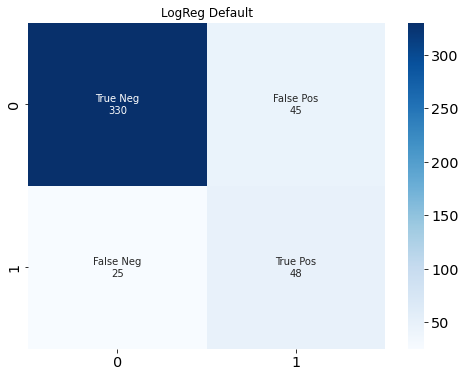

In [915]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                lr_lbfgs_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('LogReg Default')
sns.heatmap(lr_lbfgs_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

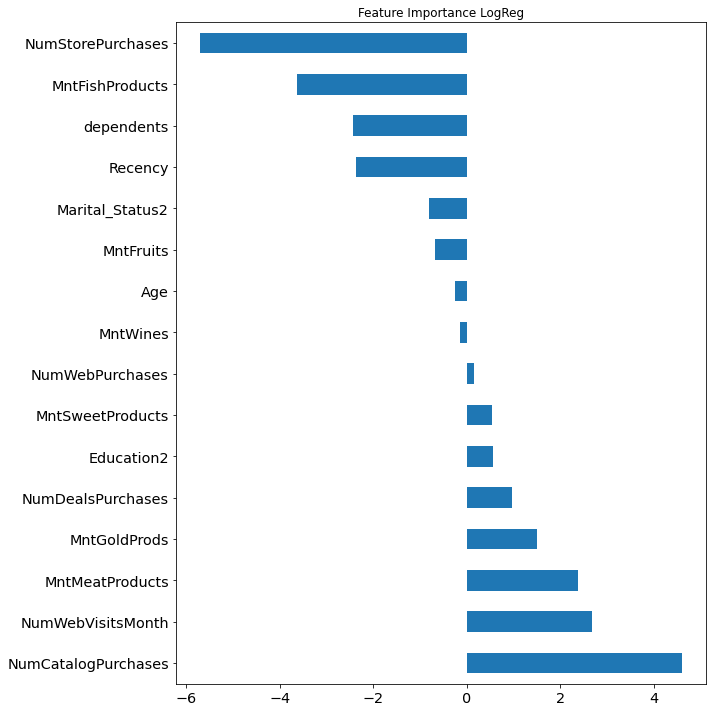

In [916]:
fig = plt.figure(figsize=(10, 10))
ftimp = pd.Series(lr_lbfgs.coef_[0], index=X_train.columns)
# ax = fig.add_subplot(3, 3, i+1)
ax = ftimp.nlargest(20).plot(kind='barh')
plt.title('Feature Importance LogReg')
# plt.ylim()
plt.tight_layout()
# plt.savefig('Feature Importance LogReg.png')

In [917]:
# mencari manual
# Coding untuk men tuning manual, satu variabel di tuning.
# dalam model logistic regresion di coding ini, yg dituning adalah variabel C, diambil dari nilai param_values
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_5(param_values, solver):
    train_recal_score = []
    train_accuracy_score = []
    train_precision_score = []
    test_recal_score = []
    test_accuracy_score = []
    test_precision_score = []

    data = [train_recal_score, train_accuracy_score, train_precision_score, test_recal_score, test_accuracy_score, test_precision_score]
    
    for c in param_values:
        model = LogisticRegression(C=c, solver = solver, class_weight='balanced') # , multi_class='multinomial'
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        # eval on train
        train_recal = recall_score(y_train, y_pred_train)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        train_precision = precision_score(y_train, y_pred_train)
        
        train_recal_score.append(train_recal)
        train_accuracy_score.append(train_accuracy)
        train_precision_score.append(train_precision)

        # eval on test
        test_recal = recall_score(y_test, y_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        
        test_recal_score.append(test_recal)
        test_accuracy_score.append(test_accuracy)
        test_precision_score.append(test_precision)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(3, 1, 1)
    plt.plot(param_values, train_recal_score, label='Train')
    plt.plot(param_values, test_recal_score, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression' + solver)
    plt.legend()
    
    ax = fig.add_subplot(3, 1, 2)
    plt.plot(param_values, train_accuracy_score, label='Train')
    plt.plot(param_values, test_accuracy_score, label='Test')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression' + solver)
    plt.legend()
    
    ax = fig.add_subplot(3, 1, 3)
    plt.plot(param_values, train_precision_score, label='Train')
    plt.plot(param_values, test_precision_score, label='Test')
    plt.xlabel('C')
    plt.ylabel('Precision')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression' + solver)
    plt.legend()
#     plt.savefig('Learning Curve - Hyperparameter C - Logistic Regression' + solver + '.png')
    plt.show()

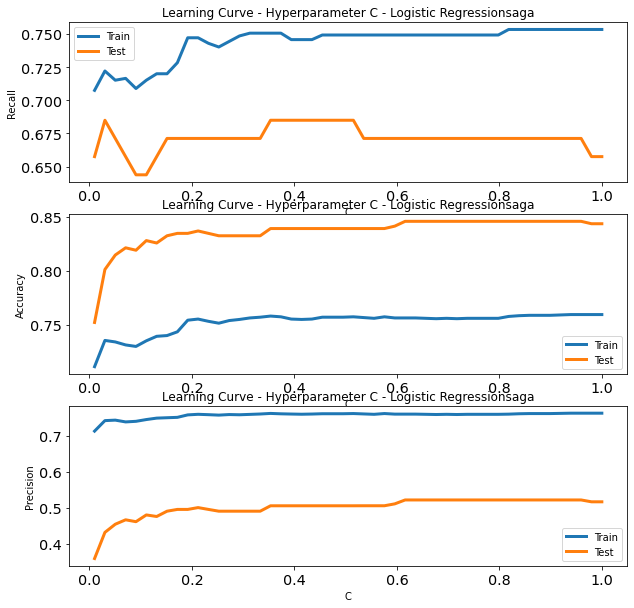

In [918]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.01, 1)]
draw_learning_curve_5(param_values, 'saga') # solver : saga

In [919]:
# terbaik
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
lr_lbfgs = LogisticRegression(solver='saga', C=0.585, class_weight='balanced') # C = 0.01 solver : saga , multi_class='multinomial'
lr_lbfgs.fit(X_train, y_train)
lr_pred_lbfgs = lr_lbfgs.predict(X_test)
lr_pred_lbfgs_train = lr_lbfgs.predict(X_train)
# print('Prediction:', lr_pred_lbfgs)
eval_classification(lr_lbfgs)

Accuracy Test: 0.839
Precision Train: 0.761
Precision Test: 0.505
Recall Train: 0.7491313412
Recall Test: 0.6712328767
F1-Score Train: 0.755
F1-Score Test: 0.576
AUC (Train): 0.853
AUC (Test): 0.865
roc_auc (crossval train):0.852852131777716
roc_auc (crossval test):0.8489329520341334


In [920]:
from sklearn.metrics import confusion_matrix
lr_lbfgs_cm = confusion_matrix(y_test, lr_pred_lbfgs)
print(lr_lbfgs_cm)

[[327  48]
 [ 24  49]]


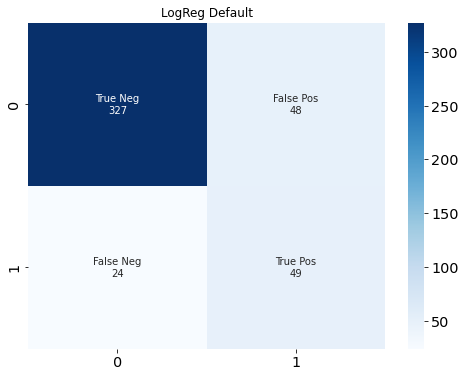

In [921]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                lr_lbfgs_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('LogReg Default')
sns.heatmap(lr_lbfgs_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

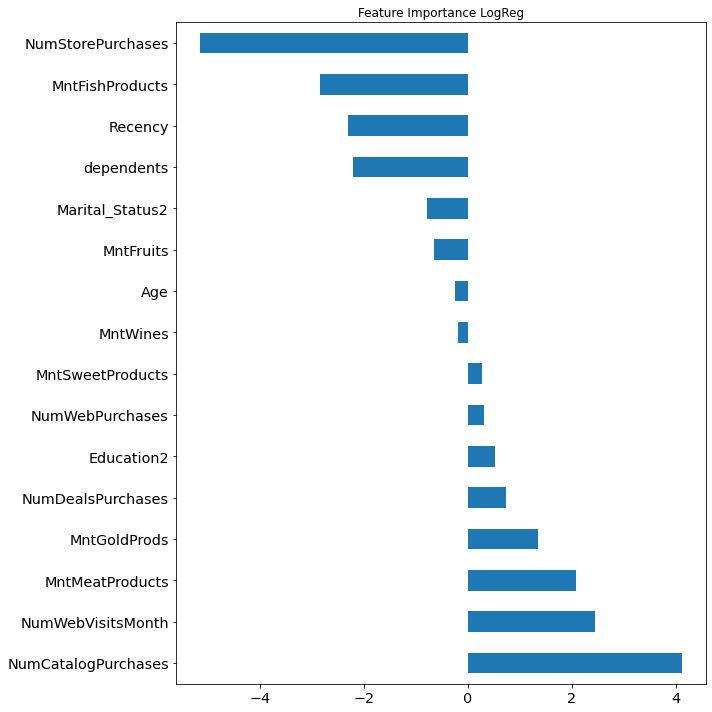

In [922]:
fig = plt.figure(figsize=(10, 10))
ftimp = pd.Series(lr_lbfgs.coef_[0], index=X_train.columns)
# ax = fig.add_subplot(3, 3, i+1)
ax = ftimp.nlargest(20).plot(kind='barh')
plt.title('Feature Importance LogReg')
# plt.ylim()
plt.tight_layout()
# plt.savefig('Feature Importance LogReg.png')

#### Decision Tree

In [923]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_train = dt.predict(X_train)
eval_classification(dt)

Accuracy Test: 0.812
Precision Train: 0.99
Precision Test: 0.392
Recall Train: 1.0
Recall Test: 0.2739726027
F1-Score Train: 0.995
F1-Score Test: 0.323
AUC (Train): 1.0
AUC (Test): 0.596
roc_auc (crossval train):0.9997859308340354
roc_auc (crossval test):0.9453582216253711


In [924]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))#classification report for logistic model prediction
print(classification_report(y_train, dt_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       375
           1       0.39      0.27      0.32        73

    accuracy                           0.81       448
   macro avg       0.63      0.60      0.61       448
weighted avg       0.79      0.81      0.80       448

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1439
           1       0.99      1.00      0.99      1439

    accuracy                           0.99      2878
   macro avg       0.99      0.99      0.99      2878
weighted avg       0.99      0.99      0.99      2878



In [925]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, dt_pred)
print(dt_cm)

[[344  31]
 [ 53  20]]


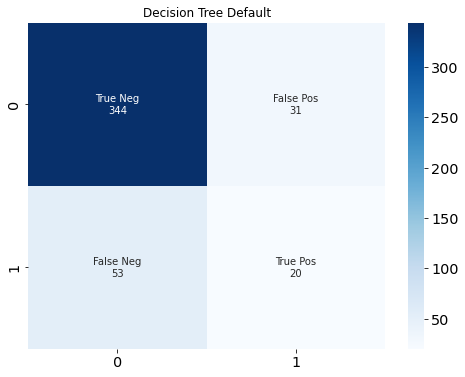

In [926]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                dt_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('Decision Tree Default')
sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [927]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
# defining parameter range
param_grid = {
              'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'class_weight' : ['dict', 'balanced']
                  } 
  
random = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3, scoring='recall', return_train_score=True)
  
# fitting the model for grid search
random.fit(X_train, y_train)
# random.fit(X_test1, y_test1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END class_weight=dict, criterion=gini, max_features=sqrt, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END class_weight=dict, criterion=gini, max_features=sqrt, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END class_weight=dict, criterion=gini, max_features=sqrt, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END class_weight=dict, criterion=gini, max_features=sqrt, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END class_weight=dict, criterion=gini, max_features=sqrt, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=random;, score=(train=1.000, test=0.993) total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=random;, score=(train=1.000, test=1.000) total time=   0.0s

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': ['dict', 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='recall', verbose=3)

In [928]:
# print best parameter after tuning
print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'splitter': 'best', 'max_features': 'auto', 'criterion': 'entropy', 'class_weight': 'balanced'}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto')


In [929]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_features='auto', splitter='best')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_train = dt.predict(X_train)
eval_classification(dt)

Accuracy Test: 0.786
Precision Train: 0.99
Precision Test: 0.291
Recall Train: 1.0
Recall Test: 0.2191780822
F1-Score Train: 0.995
F1-Score Test: 0.25
AUC (Train): 1.0
AUC (Test): 0.558
roc_auc (crossval train):0.9997859308340354
roc_auc (crossval test):0.9454311393002323


In [930]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))#classification report for logistic model prediction
print(classification_report(y_train, dt_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       375
           1       0.29      0.22      0.25        73

    accuracy                           0.79       448
   macro avg       0.57      0.56      0.56       448
weighted avg       0.76      0.79      0.77       448

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1439
           1       0.99      1.00      0.99      1439

    accuracy                           0.99      2878
   macro avg       0.99      0.99      0.99      2878
weighted avg       0.99      0.99      0.99      2878



In [931]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, dt_pred)
print(dt_cm)

[[336  39]
 [ 57  16]]


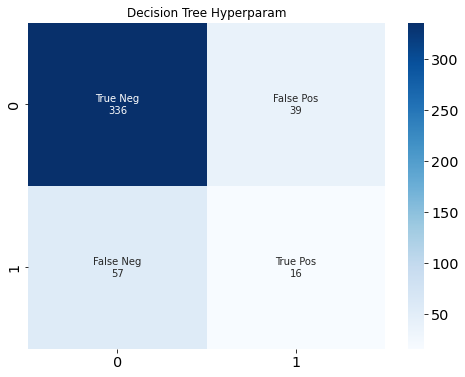

In [932]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                dt_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('Decision Tree Hyperparam')
sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

#### K-Nearest Neighbor


In [933]:
#KNN TANPA TUNING

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_train = knn.predict(X_train)
eval_classification(knn)

Accuracy Test: 0.808
Precision Train: 0.923
Precision Test: 0.4
Recall Train: 0.9902710215
Recall Test: 0.3561643836
F1-Score Train: 0.955
F1-Score Test: 0.377
AUC (Train): 0.996
AUC (Test): 0.641
roc_auc (crossval train):0.9953570577927049
roc_auc (crossval test):0.9396645770153139


In [934]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))#classification report for logistic model prediction
print(classification_report(y_train, knn_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       375
           1       0.40      0.36      0.38        73

    accuracy                           0.81       448
   macro avg       0.64      0.63      0.63       448
weighted avg       0.80      0.81      0.80       448

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1439
           1       0.92      0.99      0.96      1439

    accuracy                           0.95      2878
   macro avg       0.96      0.95      0.95      2878
weighted avg       0.96      0.95      0.95      2878



In [935]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_pred)
print(knn_cm)

[[336  39]
 [ 47  26]]


Text(47.0, 0.5, 'Actual Values')

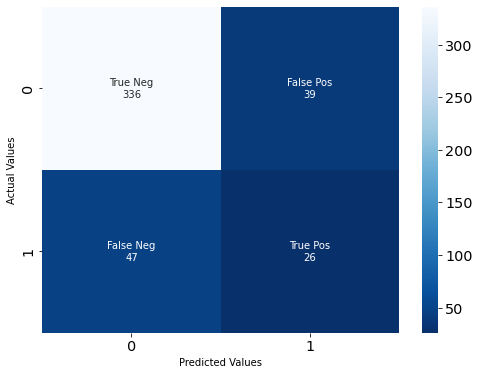

In [936]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                knn_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
cm_plot = sns.heatmap(knn_cm, annot=labels, fmt='', cmap='Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

In [937]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
# defining parameter range
param_grid = {'n_neighbors' : [int (x) for x in np.linspace(0,90)]} 
  
random = RandomizedSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3, scoring='roc_auc', return_train_score=True)
  
# fitting the model for grid search
random.fit(X_train, y_train)
# random.fit(X_test1, y_test1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=45;, score=(train=0.846, test=0.804) total time=   0.1s
[CV 2/5] END n_neighbors=45;, score=(train=0.837, test=0.836) total time=   0.0s
[CV 3/5] END n_neighbors=45;, score=(train=0.843, test=0.814) total time=   0.0s
[CV 4/5] END n_neighbors=45;, score=(train=0.843, test=0.830) total time=   0.1s
[CV 5/5] END n_neighbors=45;, score=(train=0.842, test=0.839) total time=   0.1s
[CV 1/5] END n_neighbors=16;, score=(train=0.899, test=0.836) total time=   0.0s
[CV 2/5] END n_neighbors=16;, score=(train=0.887, test=0.883) total time=   0.0s
[CV 3/5] END n_neighbors=16;, score=(train=0.891, test=0.841) total time=   0.0s
[CV 4/5] END n_neighbors=16;, score=(train=0.887, test=0.859) total time=   0.0s
[CV 5/5] END n_neighbors=16;, score=(train=0.893, test=0.852) total time=   0.1s
[CV 1/5] END n_neighbors=90;, score=(train=0.824, test=0.797) total time=   0.1s
[CV 2/5] END n_neighbors=90;, score=(train=0.810

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [0, 1, 3, 5, 7, 9, 11,
                                                        12, 14, 16, 18, 20, 22,
                                                        23, 25, 27, 29, 31, 33,
                                                        34, 36, 38, 40, 42, 44,
                                                        45, 47, 49, 51, 53, ...]},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [938]:
# print best parameter after tuning
print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [939]:
#KNN TANPA TUNING

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_train = knn.predict(X_train)
eval_classification(knn)

Accuracy Test: 0.759
Precision Train: 0.797
Precision Test: 0.333
Recall Train: 0.9534398888
Recall Test: 0.4794520548
F1-Score Train: 0.868
F1-Score Test: 0.393
AUC (Train): 0.95
AUC (Test): 0.717
roc_auc (crossval train):0.934065472511427
roc_auc (crossval test):0.8837857480602335


In [940]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))#classification report for logistic model prediction
print(classification_report(y_train, knn_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       375
           1       0.33      0.48      0.39        73

    accuracy                           0.76       448
   macro avg       0.61      0.65      0.62       448
weighted avg       0.80      0.76      0.78       448

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1439
           1       0.80      0.95      0.87      1439

    accuracy                           0.86      2878
   macro avg       0.87      0.86      0.85      2878
weighted avg       0.87      0.86      0.85      2878



In [941]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_pred)
print(knn_cm)

[[305  70]
 [ 38  35]]


Text(47.0, 0.5, 'Actual Values')

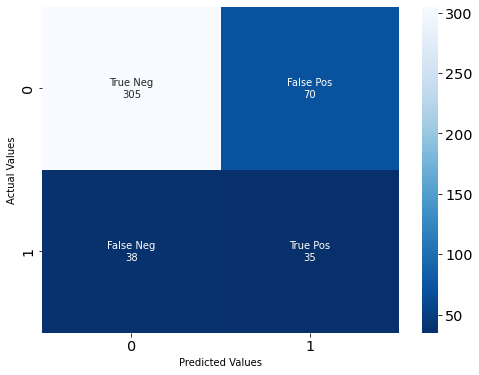

In [942]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                knn_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
cm_plot = sns.heatmap(knn_cm, annot=labels, fmt='', cmap='Blues_r')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

In [943]:
#K TERBAIK
K= np.arange(1,30)
for k in K:
  knn4= KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  knn4_predict= knn4.predict(X_test)
  knn4_predict_train= knn4.predict(X_train)
  rc= recall_score(y_test, knn4_predict)
print (knn4)
eval_classification(knn4)


KNeighborsClassifier(n_neighbors=29)
Accuracy Test: 0.768
Precision Train: 0.757
Precision Test: 0.368
Recall Train: 0.8373870744
Recall Test: 0.5890410959
F1-Score Train: 0.795
F1-Score Test: 0.453
AUC (Train): 0.861
AUC (Test): 0.784
roc_auc (crossval train):0.8513770092876214
roc_auc (crossval test):0.829494128274616


In [944]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4_predict))#classification report for logistic model prediction
print(classification_report(y_train, knn4_predict_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       375
           1       0.37      0.59      0.45        73

    accuracy                           0.77       448
   macro avg       0.64      0.70      0.65       448
weighted avg       0.82      0.77      0.79       448

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1439
           1       0.76      0.84      0.80      1439

    accuracy                           0.78      2878
   macro avg       0.79      0.78      0.78      2878
weighted avg       0.79      0.78      0.78      2878



In [945]:
from sklearn.metrics import confusion_matrix
rs_cm2 = confusion_matrix(y_test, knn4_predict)
print(rs_cm2)

[[301  74]
 [ 30  43]]


Text(47.0, 0.5, 'Actual Values')

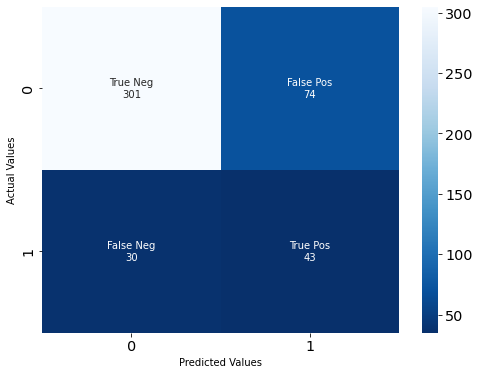

In [946]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rs_cm2.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
cm_plot2 = sns.heatmap(knn_cm, annot=labels, fmt='', cmap='Blues_r')
cm_plot2.set_xlabel('Predicted Values')
cm_plot2.set_ylabel('Actual Values')

#### XGboost

In [947]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb= XGBClassifier(booster='gblinear', random_state=42)#booster='gblinear', 'gbtree', 'gbdart' # dihapus : objective='binary:logistic'
# setelah dilakukan percobaan trial and error booster terbaik adalah 'gblinear' 
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy Test: 0.842
Precision Train: 0.769
Precision Test: 0.511
Recall Train: 0.7755385685
Recall Test: 0.6438356164
F1-Score Train: 0.772
F1-Score Test: 0.57
AUC (Train): 0.857
AUC (Test): 0.866
roc_auc (crossval train):0.8572208008740558
roc_auc (crossval test):0.8526336983669935


In [948]:
xgb_pred = xgb.predict(X_test)
xgb_pred_train = xgb.predict(X_train)
# xgb_pred

In [949]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))#classification report for logistic model prediction
print(classification_report(y_train, xgb_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       375
           1       0.51      0.64      0.57        73

    accuracy                           0.84       448
   macro avg       0.72      0.76      0.74       448
weighted avg       0.86      0.84      0.85       448

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1439
           1       0.77      0.78      0.77      1439

    accuracy                           0.77      2878
   macro avg       0.77      0.77      0.77      2878
weighted avg       0.77      0.77      0.77      2878



In [950]:
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
print(xgb_cm)

[[330  45]
 [ 26  47]]


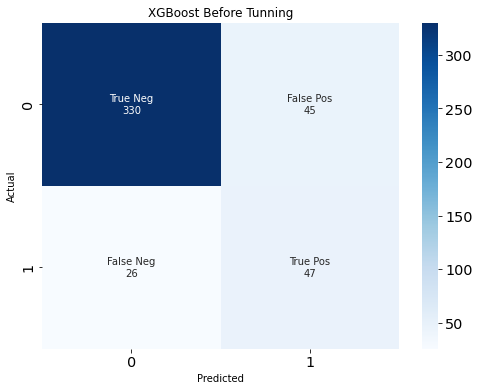

In [951]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgb_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('XGBoost Before Tunning')
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='Blues') #Blues , Crest
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [952]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
# defining parameter range
param_grid = {'booster': ['gblinear','gbtree'], 
              # 'gamma': np.linspace(0,10,101),
              # 'max_depth': np.linspace(0,1, 11),
              # 'min_child_weight' : np.linspace(1, 20, num = 11),
              # 'tree_method' : ['auto', 'exact', 'approx', 'hist','gpu_hist'],
              # 'grow_policy': ['depthwise','lossguide'],
              # 'colsample_bytree' : np.linspace(0, 1, num = 11),
              # 'eta' : np.linspace(0, 100, num = 100),
              # 'base_score' : np.linspace(0, 1, num = 11),
              # 'alpha' : np.linspace(0, 100, num = 101),
              'eval_metric': ['auc','error'],
              'objective': ['binary:logistic','binary:logitraw','binary:hinge']}
              # 'normalize_type' :['tree','forest']}
  
random = RandomizedSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, scoring='recall', cv=5,n_iter=20)
# random = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='recall',
                            # random_state=42, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)
 
# fitting the model for grid search
random.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END booster=gblinear, eval_metric=auc, objective=binary:logistic;, score=0.764 total time=   0.0s
[CV 2/5] END booster=gblinear, eval_metric=auc, objective=binary:logistic;, score=0.757 total time=   0.0s
[CV 3/5] END booster=gblinear, eval_metric=auc, objective=binary:logistic;, score=0.785 total time=   0.0s
[CV 4/5] END booster=gblinear, eval_metric=auc, objective=binary:logistic;, score=0.767 total time=   0.1s
[CV 5/5] END booster=gblinear, eval_metric=auc, objective=binary:logistic;, score=0.794 total time=   0.0s
[CV 1/5] END booster=gblinear, eval_metric=auc, objective=binary:logitraw;, score=0.667 total time=   0.0s
[CV 2/5] END booster=gblinear, eval_metric=auc, objective=binary:logitraw;, score=0.646 total time=   0.0s
[CV 3/5] END booster=gblinear, eval_metric=auc, objective=binary:logitraw;, score=0.698 total time=   0.0s
[CV 4/5] END booster=gblinear, eval_metric=auc, objective=binary:logitraw;, score=0

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

In [953]:
print(random.best_estimator_, param_grid)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) {'booster': ['gblinear', 'gbtree'], 'eval_metric': ['auc', 'error'], 'objective': ['binary:logistic', 'binary:logitraw', 'binary:hinge']}


In [954]:
print(random.best_params_)

{'objective': 'binary:logistic', 'eval_metric': 'auc', 'booster': 'gbtree'}


In [955]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb= XGBClassifier(objective="binary:hinge", random_state=42, booster='gblinear',
                  eval_metric='auc')#booster='gblinear', 'gbtree', 'gbdart'
# setelah dilakukan percobaan trial and error booster terbaik adalah 'gblinear' karna gap nilai recall train test tidak jauh
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy Test: 0.846
Precision Train: 0.76
Precision Test: 0.52
Recall Train: 0.7699791522
Recall Test: 0.7123287671
F1-Score Train: 0.765
F1-Score Test: 0.601
AUC (Train): 0.763
AUC (Test): 0.792
roc_auc (crossval train):0.7655476970508738
roc_auc (crossval test):0.7578348819202478


In [956]:
xgb_pred = xgb.predict(X_test)
xgb_pred_train = xgb.predict(X_train)
# xgb_pred

In [957]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))#classification report for logistic model prediction
print(classification_report(y_train, xgb_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       375
           1       0.52      0.71      0.60        73

    accuracy                           0.85       448
   macro avg       0.73      0.79      0.75       448
weighted avg       0.87      0.85      0.86       448

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1439
           1       0.76      0.77      0.76      1439

    accuracy                           0.76      2878
   macro avg       0.76      0.76      0.76      2878
weighted avg       0.76      0.76      0.76      2878



In [958]:
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
print(xgb_cm)

[[327  48]
 [ 21  52]]


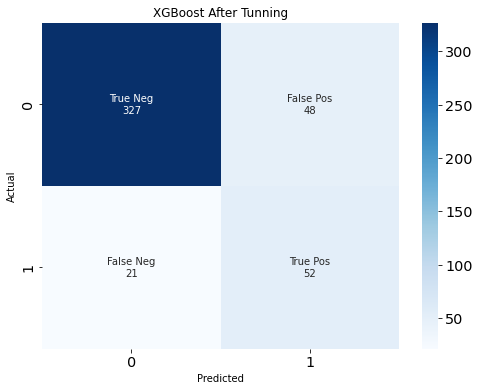

In [959]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgb_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('XGBoost After Tunning')
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='Blues') #Blues , Crest
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

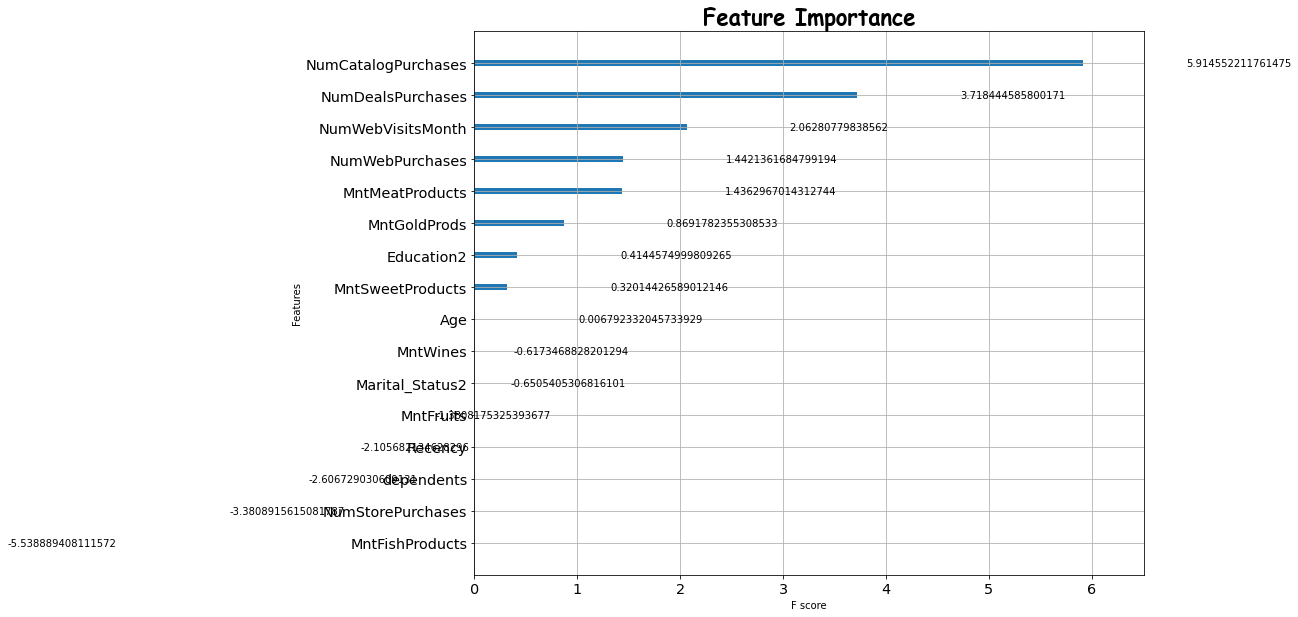

In [960]:
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb = XGBClassifier(objective="binary:hinge", random_state=42, booster='gblinear',
                  eval_metric='auc')
xgb.fit(X_train, y_train)
# plot feature importance
plot_importance(xgb)
# left, bottom, width, height = (0, 12.7, 3.3 , 2.7)
# rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          # alpha=0.2, facecolor='red', edgecolor='black')
# plt.gca().add_patch(rect);
# plt.text(2.76, 13.4, 'These feature can\n be an opportunity\n to increase our\n business !', fontsize=14, fontstyle='italic',
        # color='blue', fontweight='bold')
plt.title('Feature Importance',fontsize=22, fontweight='bold', fontname="Comic Sans MS")
# plt.ylim(6.5, 16)
# plt.xlim(0,4)
pyplot.show()

In [961]:
model = XGBClassifier(booster='gblinear', random_state=42)
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

[ 1.5269552  -4.848553    0.6972591   0.6679247  -0.7841599  -0.5544303
 -1.9713537  -0.14008522 -1.6855986   0.39770898 -0.54821754  2.6636026
  1.3569708   5.2601404  -3.0951602   2.0569973 ]


In [962]:
features=X_train.columns
features


Index(['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntFruits', 'MntWines', 'dependents', 'Age', 'Recency',
       'Education2', 'Marital_Status2', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [963]:

df3 = pd.DataFrame(data=model.feature_importances_, index=features).reset_index(drop=False)
df3.columns=['Feature','Score']
df3 = df3.sort_values('Score',ascending=False)

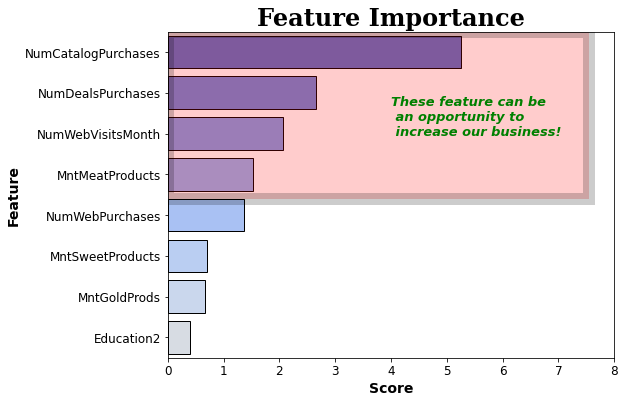

In [964]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=df3['Score'], y=df3['Feature'],edgecolor='black', palette = "coolwarm")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(7.5, -0.5)
plt.xlim(0,8)
plt.title('Feature Importance',fontsize=24, fontweight='bold', fontname="serif")

left, bottom, width, height = (0,-0.5, 7.55 , 4.1)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.2, facecolor='red', edgecolor='black', linewidth=12)
plt.gca().add_patch(rect)
# for label in ax.containers:
    # ax.bar_label(label, fontweight='bold')
plt.text(4.0, 2.05, 'These feature can be\n an opportunity to\n increase our business!', fontsize=13, fontstyle='italic',
        color='green', fontweight='bold')
plt.xlabel('Score',fontsize=14,fontweight='bold')
plt.ylabel('Feature',fontsize=14, fontweight='bold')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
# plt.savefig('Feature Importance Xgboost.png', dpi=300, bbox_inches = "tight")
plt.show()

#### AdaBoost

In [965]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_train = clf.predict(X_train)
eval_classification(clf)

Accuracy Test: 0.812
Precision Train: 0.831
Precision Test: 0.43
Recall Train: 0.8311327311
Recall Test: 0.4657534247
F1-Score Train: 0.831
F1-Score Test: 0.447
AUC (Train): 0.922
AUC (Test): 0.829
roc_auc (crossval train):0.9239931743889166
roc_auc (crossval test):0.9000282966619351


In [966]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))#classification report for logistic model prediction
print(classification_report(y_train, clf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       375
           1       0.43      0.47      0.45        73

    accuracy                           0.81       448
   macro avg       0.66      0.67      0.67       448
weighted avg       0.82      0.81      0.82       448

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1439
           1       0.83      0.83      0.83      1439

    accuracy                           0.83      2878
   macro avg       0.83      0.83      0.83      2878
weighted avg       0.83      0.83      0.83      2878



In [967]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test, clf_pred)
print(clf_cm)

[[330  45]
 [ 39  34]]


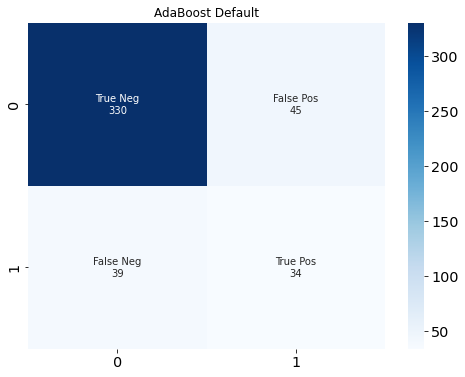

In [968]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                clf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('AdaBoost Default')
sns.heatmap(clf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [969]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# defining parameter range
param_grid = {
              'learning_rate': np.linspace(0.01, 1, 15),
              'algorithm' : ['SAMME', 'SAMME.R']
             } 
  
grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, scoring='recall')
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01;, score=0.847 total time=   0.7s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01;, score=0.847 total time=   0.5s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01;, score=0.705 total time=   0.9s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01;, score=0.858 total time=   0.8s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01;, score=0.756 total time=   1.5s
[CV 1/5] END algorithm=SAMME, learning_rate=0.08071428571428571;, score=0.812 total time=   1.2s
[CV 2/5] END algorithm=SAMME, learning_rate=0.08071428571428571;, score=0.806 total time=   1.0s
[CV 3/5] END algorithm=SAMME, learning_rate=0.08071428571428571;, score=0.837 total time=   0.8s
[CV 4/5] END algorithm=SAMME, learning_rate=0.08071428571428571;, score=0.802 total time=   0.8s
[CV 5/5] END algorithm=SAMME, learning_rate=0.08071428571428571;, score=0.840 total time=   0.5s
[CV 1/5] END algorithm=SAMME, learning_rate

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])},
             scoring='recall', verbose=3)

In [970]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.9292857142857143}
AdaBoostClassifier(learning_rate=0.9292857142857143)


In [971]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.9292857142857143)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_train = clf.predict(X_train)
eval_classification(clf)

Accuracy Test: 0.821
Precision Train: 0.831
Precision Test: 0.458
Recall Train: 0.8485059069
Recall Test: 0.5205479452
F1-Score Train: 0.839
F1-Score Test: 0.487
AUC (Train): 0.921
AUC (Test): 0.833
roc_auc (crossval train):0.9232928280491643
roc_auc (crossval test):0.898432467428593


In [972]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))#classification report for logistic model prediction
print(classification_report(y_train, clf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       375
           1       0.46      0.52      0.49        73

    accuracy                           0.82       448
   macro avg       0.68      0.70      0.69       448
weighted avg       0.83      0.82      0.83       448

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1439
           1       0.83      0.85      0.84      1439

    accuracy                           0.84      2878
   macro avg       0.84      0.84      0.84      2878
weighted avg       0.84      0.84      0.84      2878



In [973]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test, clf_pred)
print(clf_cm)

[[330  45]
 [ 35  38]]


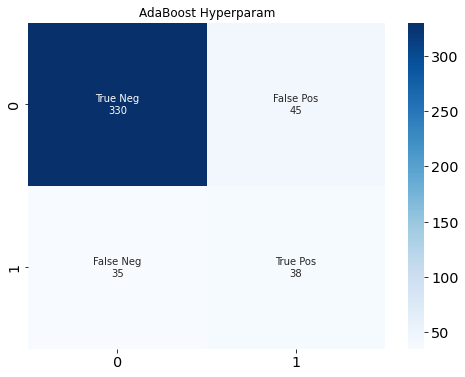

In [974]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                clf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('AdaBoost Hyperparam')
sns.heatmap(clf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [975]:
# terbaik
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05263157894736842)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_train = clf.predict(X_train)
eval_classification(clf)

Accuracy Test: 0.703
Precision Train: 0.728
Precision Test: 0.319
Recall Train: 0.766504517
Recall Test: 0.7260273973
F1-Score Train: 0.747
F1-Score Test: 0.444
AUC (Train): 0.824
AUC (Test): 0.777
roc_auc (crossval train):0.8258204749687144
roc_auc (crossval test):0.8146740162373103


In [976]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))#classification report for logistic model prediction
print(classification_report(y_train, clf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       375
           1       0.32      0.73      0.44        73

    accuracy                           0.70       448
   macro avg       0.62      0.71      0.62       448
weighted avg       0.83      0.70      0.74       448

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1439
           1       0.73      0.77      0.75      1439

    accuracy                           0.74      2878
   macro avg       0.74      0.74      0.74      2878
weighted avg       0.74      0.74      0.74      2878



In [977]:
# terbaik
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test, clf_pred)
print(clf_cm)

[[262 113]
 [ 20  53]]


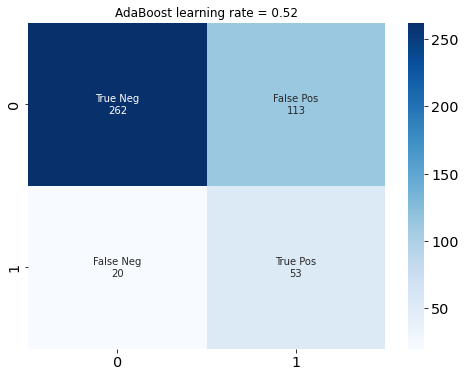

In [978]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                clf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('AdaBoost learning rate = 0.52')
sns.heatmap(clf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

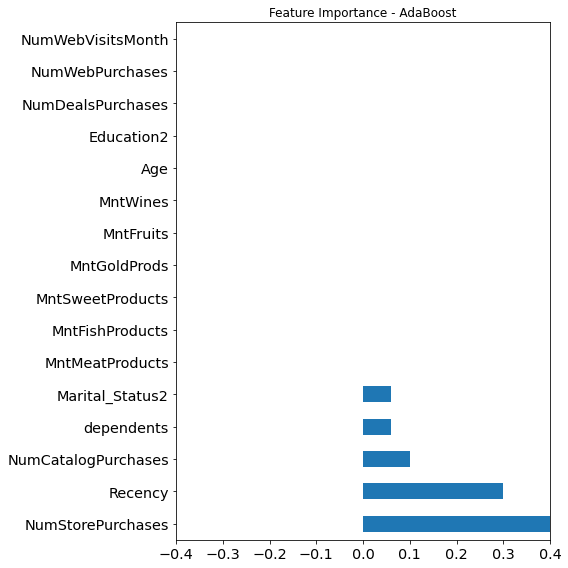

In [979]:
plt.figure(figsize=(8,8))
ftimp = pd.Series(clf.feature_importances_, index=X_train.columns)
ax = ftimp.nlargest(20).plot(kind='barh')
plt.title('Feature Importance - AdaBoost')
plt.xlim(-0.4, 0.4)
plt.tight_layout()
# plt.savefig('Feature Importance - AdaBoost.png')

#### SVM

In [980]:
from sklearn import svm
clf = svm.SVC(probability=True,  kernel='linear') #parameter hyper C=0.9990990001
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy Test: 0.846
Precision Train: 0.766
Precision Test: 0.52
Recall Train: 0.7623349548
Recall Test: 0.7123287671
F1-Score Train: 0.764
F1-Score Test: 0.601
AUC (Train): 0.855
AUC (Test): 0.867
roc_auc (crossval train):0.8549431614975674
roc_auc (crossval test):0.8495668459908805


In [981]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = svm.SVC(probability=True,kernel='linear')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_train = clf.predict(X_train)
print('Predicton:', clf_pred)

Predicton: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0]


In [982]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))#classification report for logistic model prediction
print(classification_report(y_train, clf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       375
           1       0.52      0.71      0.60        73

    accuracy                           0.85       448
   macro avg       0.73      0.79      0.75       448
weighted avg       0.87      0.85      0.86       448

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1439
           1       0.77      0.76      0.76      1439

    accuracy                           0.76      2878
   macro avg       0.76      0.76      0.76      2878
weighted avg       0.76      0.76      0.76      2878



In [983]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test, clf_pred)
print(clf_cm)

[[327  48]
 [ 21  52]]


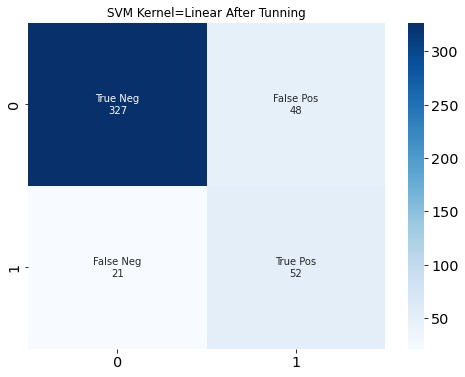

In [984]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                clf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
plt.title('SVM Kernel=Linear After Tunning')
sns.heatmap(clf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

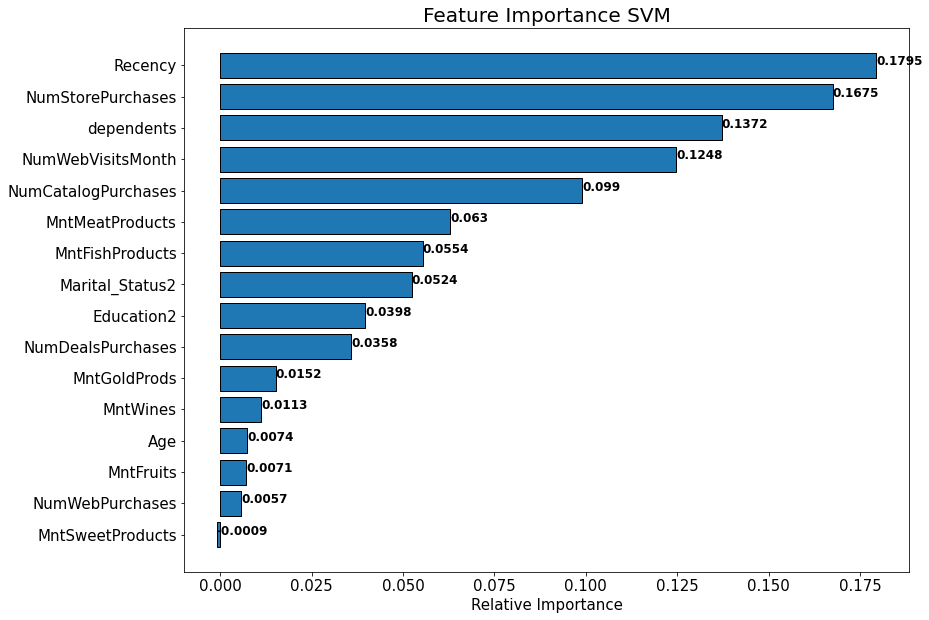

In [985]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)

perm_importance = permutation_importance(svm, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X_train.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,10))
plt.title("Feature Importance SVM",fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], align='center', edgecolor='black')
# ax=sns.barplot(features[sorted_idx], perm_importance_normalized[sorted_idx], align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,4)), fontsize=12,fontweight='bold')

plt.show()

In [986]:
df2 = pd.DataFrame(data=perm_importance_normalized, index=features).reset_index(drop=False)
df2.columns=['Feature','Score']
df2 = df2.sort_values('Score',ascending=False)

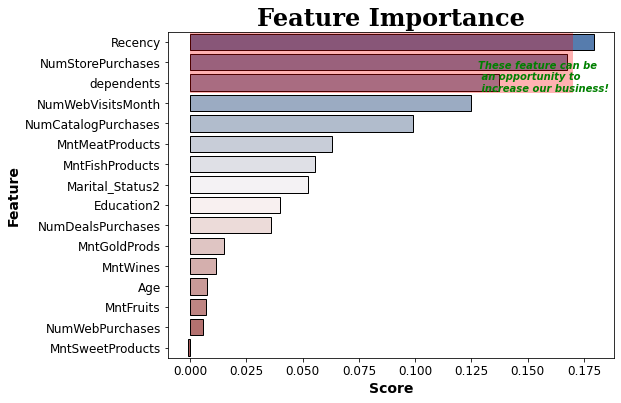

In [987]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8, 6))
ax= sns.barplot(x=df2['Score'], y=df2['Feature'],edgecolor='black', palette = "vlag")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim(0,9)
# plt.xlim(0,4)
plt.title('Feature Importance',fontsize=24, fontweight='bold', fontname="serif")

left, bottom, width, height = (0,-0.5, 0.17 , 3.0)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='red')
plt.gca().add_patch(rect)

# for label in ax.containers:
    # ax.bar_label(label, fontweight='bold')
plt.text(0.128, 2.42, 'These feature can be\n an opportunity to\n increase our business!', fontsize=10, fontstyle='italic',
        color='green', fontweight='bold')
plt.xlabel('Score',fontsize=14,fontweight='bold')
plt.ylabel('Feature',fontsize=14, fontweight='bold')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
# plt.savefig('Feature Importance Xgboost.png', dpi=300, bbox_inches = "tight")
plt.show()

#### Random Forest Classifier

In [988]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #hyper=class_weight='balanced', criterion='entropy',
                       # max_depth=40.0, max_features=4, normal=default
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
print('Predicton:', rf_pred)

Predicton: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [989]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))#classification report for logistic model prediction
print(classification_report(y_train, rf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       375
           1       0.82      0.19      0.31        73

    accuracy                           0.86       448
   macro avg       0.84      0.59      0.62       448
weighted avg       0.86      0.86      0.82       448

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1439
           1       0.99      1.00      0.99      1439

    accuracy                           0.99      2878
   macro avg       0.99      0.99      0.99      2878
weighted avg       0.99      0.99      0.99      2878



In [990]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy Test: 0.85
Precision Train: 0.99
Precision Test: 0.688
Recall Train: 1.0
Recall Test: 0.1506849315
F1-Score Train: 0.995
F1-Score Test: 0.247
AUC (Train): 1.0
AUC (Test): 0.841
roc_auc (crossval train):0.9997359834740169
roc_auc (crossval test):0.9960517334898051


In [991]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[372   3]
 [ 59  14]]


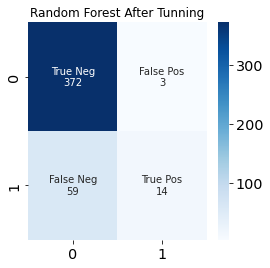

In [992]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Random Forest After Tunning')
plt.show()
# plt.savefig('Confusion Matrix random forest classifier.png')

In [993]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
# defining parameter range
param_grid = {'max_depth': [int(x) for x in np.linspace(1.0,100.0, 11)],
             'max_features':[int(x) for x in np.linspace(1,10,10)]}
  
random = RandomizedSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, scoring='recall', 
                            cv=5,n_iter=20, random_state=42)
# random = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='recall',
                            # random_state=42, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)
 
# fitting the model for grid search
random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......max_depth=70, max_features=9;, score=0.993 total time=   5.8s
[CV 2/5] END ......max_depth=70, max_features=9;, score=1.000 total time=   4.0s
[CV 3/5] END ......max_depth=70, max_features=9;, score=1.000 total time=   6.7s
[CV 4/5] END ......max_depth=70, max_features=9;, score=1.000 total time=   8.1s
[CV 5/5] END ......max_depth=70, max_features=9;, score=1.000 total time=   2.9s
[CV 1/5] END ......max_depth=10, max_features=1;, score=0.993 total time=   0.8s
[CV 2/5] END ......max_depth=10, max_features=1;, score=1.000 total time=   0.8s
[CV 3/5] END ......max_depth=10, max_features=1;, score=1.000 total time=   0.8s
[CV 4/5] END ......max_depth=10, max_features=1;, score=1.000 total time=   0.9s
[CV 5/5] END ......max_depth=10, max_features=1;, score=1.000 total time=   0.9s
[CV 1/5] END .......max_depth=1, max_features=5;, score=0.736 total time=   0.7s
[CV 2/5] END .......max_depth=1, max_features=5

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]},
                   random_state=42, scoring='recall', verbose=3)

In [994]:
print(random.best_estimator_, param_grid)

RandomForestClassifier(max_depth=70, max_features=9) {'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [995]:
# print best parameter after tuning
print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'max_features': 9, 'max_depth': 70}
RandomForestClassifier(max_depth=70, max_features=9)


In [996]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=70, max_features=9)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
eval_classification(rf)

Accuracy Test: 0.855
Precision Train: 0.99
Precision Test: 0.667
Recall Train: 1.0
Recall Test: 0.2191780822
F1-Score Train: 0.995
F1-Score Test: 0.33
AUC (Train): 1.0
AUC (Test): 0.85
roc_auc (crossval train):0.9997406564766876
roc_auc (crossval test):0.9953999902877253


In [997]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))#classification report for logistic model prediction
print(classification_report(y_train, clf_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       375
           1       0.52      0.71      0.60        73

    accuracy                           0.85       448
   macro avg       0.73      0.79      0.75       448
weighted avg       0.87      0.85      0.86       448

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1439
           1       0.77      0.76      0.76      1439

    accuracy                           0.76      2878
   macro avg       0.76      0.76      0.76      2878
weighted avg       0.76      0.76      0.76      2878



In [998]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[367   8]
 [ 57  16]]


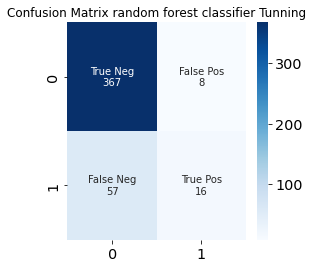

In [999]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

In [1000]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
import numpy as np
#rf = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
#                             max_depth=80.0, max_features=1)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1001]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importance_rf=feature_scores.to_frame().reset_index(drop=False)

In [1002]:
feature_importance_rf.columns= ['feature', 'value']
feature_importance_rf

,feature,value
0,NumStorePurchases,0.150030
1,Recency,0.123999
2,NumCatalogPurchases,0.088132
3,MntGoldProds,0.071329
4,MntMeatProducts,0.062830
5,NumDealsPurchases,0.057786
6,MntFishProducts,0.056024
7,MntWines,0.054843
8,NumWebVisitsMonth,0.054839
9,NumWebPurchases,0.054153


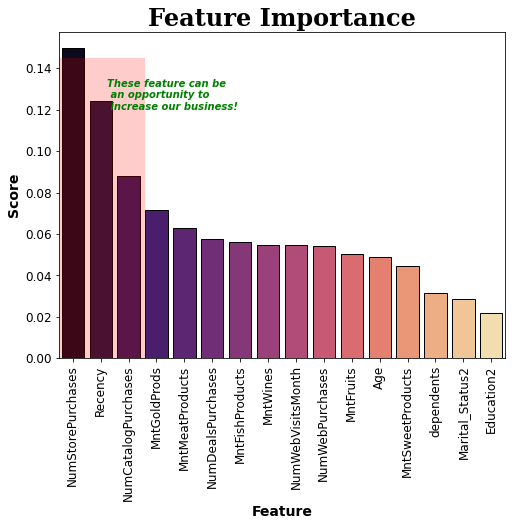

In [1003]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8, 6))
ax= sns.barplot(y=feature_importance_rf['value'], x=feature_importance_rf['feature'],edgecolor='black', palette = "magma")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
# plt.ylim(0,10)
# plt.xlim(0,4)
plt.title('Feature Importance',fontsize=24, fontweight='bold', fontname="serif")

left, bottom, width, height = (-0.5,0, 3.1 , 0.145)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.2, facecolor='red')
plt.gca().add_patch(rect)

# for label in ax.containers:
    # ax.bar_label(label, fontweight='bold')
plt.text(1.24, 0.12, 'These feature can be\n an opportunity to\n increase our business!', fontsize=10, fontstyle='italic',
        color='green', fontweight='bold')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Score',fontsize=14, fontweight='bold')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
# plt.savefig('Feature Importance Xgboost.png', dpi=300, bbox_inches = "tight")
plt.show()

### Naive Bayes

In [1004]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_pred = gnb.fit(X_train, y_train).predict(X_test)
nb_pred_train = gnb.fit(X_train, y_train).predict(X_train)

print(nb_pred)
eval_classification(gnb)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0]
Accuracy Test: 0.73
Precision Train: 0.72
Precision Test: 0.354
Recall Train: 0.8061153579

In [1005]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))#classification report for logistic model prediction
print(classification_report(y_train, nb_pred_train))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       375
           1       0.35      0.79      0.49        73

    accuracy                           0.73       448
   macro avg       0.65      0.76      0.65       448
weighted avg       0.85      0.73      0.76       448

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1439
           1       0.72      0.81      0.76      1439

    accuracy                           0.75      2878
   macro avg       0.75      0.75      0.75      2878
weighted avg       0.75      0.75      0.75      2878



In [1006]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_pred)
print(nb_cm)

[[269 106]
 [ 15  58]]


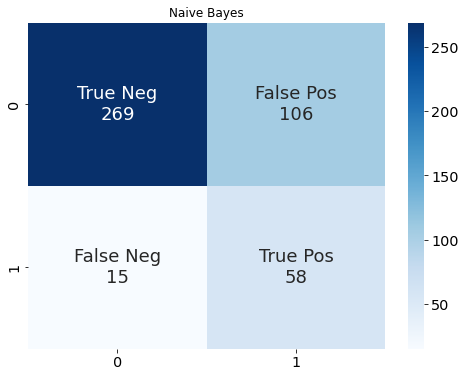

In [1007]:
# Confusion Matrix

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                nb_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 18})
plt.title("Naive Bayes")
plt.show()

In [1008]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

param_grid = { 'var_smoothing': np.logspace(0.001,100, num=100)}

random_search = RandomizedSearchCV(GaussianNB(), param_grid, scoring='recall', cv= 10, n_jobs=-1, 
                                   refit = True, verbose = 3,n_iter=20, random_state=42) 
random_search.fit(X_train, y_train)
# eval_classification(random_search)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00230524e+000, 1.02586664e+001, 1.04998191e+002, 1.07466407e+003,
       1.09992643e+004, 1.12578263e+005, 1.15224665e+006, 1.17933276e+007,
       1.20705559e+008, 1.23543011e+009, 1.26447163e+010, 1.29419584e+011,
       1.32461878e+012, 1.35575688e+013, 1.38762695e+01...
       6.43091438e+080, 6.58208727e+081, 6.73681382e+082, 6.89517756e+083,
       7.05726400e+084, 7.22316063e+085, 7.39295703e+086, 7.56674487e+087,
       7.74461798e+088, 7.92667239e+089, 8.11300639e+090, 8.30372059e+091,
       8.49891795e+092, 8.69870385e+093, 8.90318617e+094, 9.11247529e+095,
       9.32668422e+096, 9.54592860e+097, 9.77032681e+098, 1.00000000e+100])},
                   random_state=42, scoring='recall', verbose=3)

In [1009]:
# print best parameter after tuning
print(random_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

{'var_smoothing': 1.0023052380778996}
GaussianNB(var_smoothing=1.0023052380778996)


In [1010]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1.0023052380778996)
nb_pred = gnb.fit(X_train, y_train).predict(X_test)
nb_pred_train = gnb.fit(X_train, y_train).predict(X_train)

print(nb_pred)
eval_classification(gnb)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1]
Accuracy Test: 0.752
Precision Train: 0.681
Precision Test: 0.33
Recall Train: 0.557331480

In [1011]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_pred)
print(nb_cm)

[[300  75]
 [ 36  37]]
